<h1>Dataset Regresión Logística – Titanic:</h1>
<p><strong>Autor:</strong> Nicolas Linares</p>

In [136]:
pip install scikit-learn

In [137]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
datosCvs= pd.read_csv('./TitanicDS.csv')

In [141]:
datosCvs.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [142]:
datosCvs.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


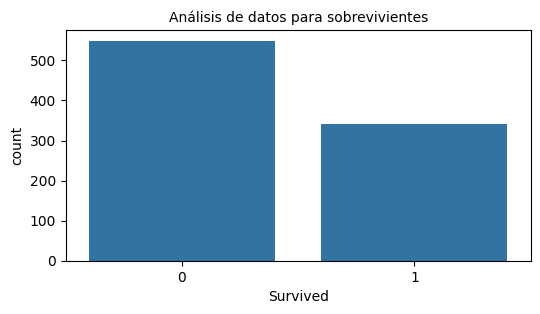

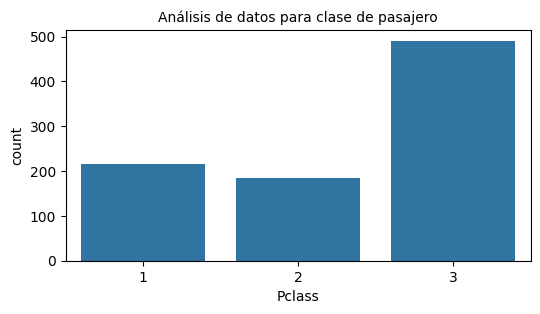

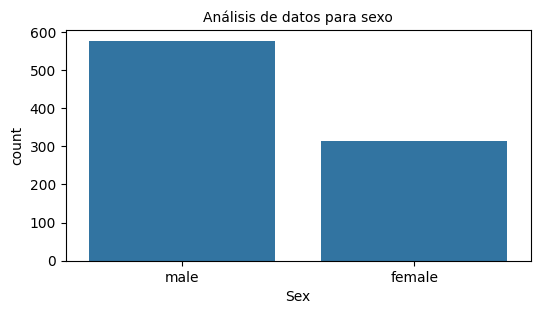

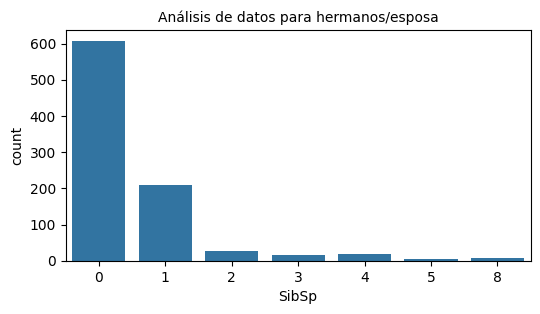

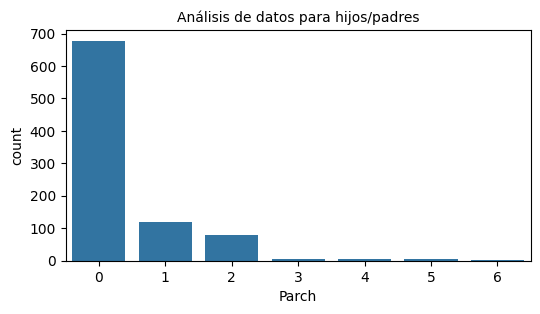

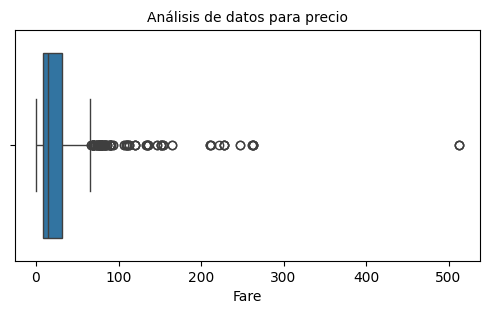

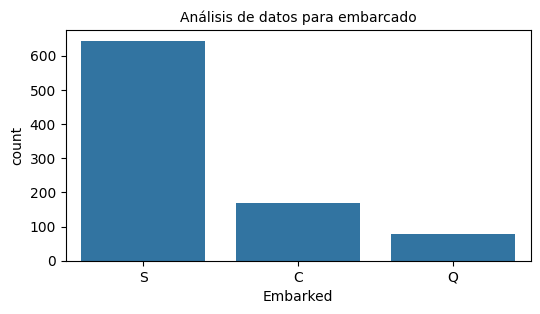

In [143]:
#Sobrevivió
plt.figure(figsize=(6, 3))
sns.countplot(x='Survived', data=datosCvs)
plt.title('Análisis de datos para sobrevivientes', fontsize=10)
plt.show()

#ClasePasajero (variable categórica)
plt.figure(figsize=(6, 3))
sns.countplot(x='Pclass', data=datosCvs)
plt.title('Análisis de datos para clase de pasajero', fontsize=10)
plt.show()

#Nombre (variable cualitativa, no se puede graficar)
#Sexo (variable categórica)
plt.figure(figsize=(6, 3))
sns.countplot(x='Sex', data=datosCvs)
plt.title('Análisis de datos para sexo', fontsize=10)
plt.show()

#HermanosEsposo (variable categórica)
plt.figure(figsize=(6, 3))
sns.countplot(x='SibSp', data=datosCvs)
plt.title('Análisis de datos para hermanos/esposa', fontsize=10)
plt.show()

#HijosPadres (variable categórica)
plt.figure(figsize=(6, 3))
sns.countplot(x='Parch', data=datosCvs)
plt.title('Análisis de datos para hijos/padres', fontsize=10)
plt.show()

#Billete (variable cualitativa, no se puede graficar)
#Precio
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['Fare'])
plt.title('Análisis de datos para precio', fontsize=10)
plt.show()

#Camarote (variable cualitativa, no se puede graficar)
#Embarcado (variable categórica)
plt.figure(figsize=(6, 3))
sns.countplot(x='Embarked', data=datosCvs)
plt.title('Análisis de datos para embarcado', fontsize=10)
plt.show()

In [144]:
print("Cantidad de registros con 0 en SibSp:", datosCvs['SibSp'].isin([0]).sum())
print("Cantidad de registros con 0 en Parch:", datosCvs['Parch'].isin([0]).sum())
print("Cantidad de registros con 0 en Fare:", datosCvs['Fare'].isin([0]).sum())

#Note: No es necesario validar la cantidad de valores en 0 para PassengerId, Survived, Pclass, Name, Sex, Embarked ya que estas variables no deben contener 0.
#Además, no se puede validar la cantidad de valores en 0 para Ticket y Cabin ya que son variables cualitativas

Cantidad de registros con 0 en SibSp: 608
Cantidad de registros con 0 en Parch: 678
Cantidad de registros con 0 en Fare: 15


In [145]:
# Age
ageMax = 90
ageMin = 5
atipicosEdad = ((datosCvs['Age'] < ageMin) | (datosCvs['Age'] > ageMax)).sum()
print("El total de edades atípicas es {}".format(atipicosEdad))

#SibSp
sibspMax = 10
sibspMin = 0
atipicosSibSp = ((datosCvs['SibSp'] < sibspMin) | (datosCvs['SibSp'] > sibspMax)).sum()
print("El total de valores atípicos en SibSp es {}".format(atipicosSibSp))

#Parch
parchMax = 10
parchMin = 0
atipicosParch = ((datosCvs['Parch'] < parchMin) | (datosCvs['Parch'] > parchMax)).sum()
print("El total de valores atípicos en Parch es {}".format(atipicosParch))

#Fare
fareMax = 1000
fareMin = 0
atipicosFare = ((datosCvs['Fare'] < fareMin) | (datosCvs['Fare'] > fareMax)).sum()
print("El total de valores atípicos en Fare es {}".format(atipicosFare))

#Note: No es necesario condicionar los valores para PassengerId, Survived, Pclass, Name, Sex, Embarked ya que estas variables no deben contener valores atípicos.
#Además, no se puede condicionar los valores para Ticket y Cabin ya que son variables cualitativas.

El total de edades atípicas es 40
El total de valores atípicos en SibSp es 0
El total de valores atípicos en Parch es 0
El total de valores atípicos en Fare es 0


In [146]:
datosCvs = datosCvs[(datosCvs['Age'] < ageMax) & (datosCvs['Age'] > ageMin)]
datosCvs = datosCvs[(datosCvs['SibSp'] < sibspMax) & (datosCvs['SibSp'] > sibspMin)]
datosCvs = datosCvs[(datosCvs['Parch'] < parchMax) & (datosCvs['Parch'] > parchMin)]
datosCvs = datosCvs[(datosCvs['Fare'] < fareMax) & (datosCvs['Fare'] > fareMin)]

#Note: No es necesario evaluar si quedaron valores por fuera de los parámetros para PassengerId, Survived, Pclass, Name, Sex, Embarked, Ticket y Cabin ya que estas variables no deben ser condicionadas.

In [147]:
datosCvs.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [148]:
atipicosEdad = ((datosCvs['Age']<ageMin) | (datosCvs['Age']>ageMax)).sum()
atipicosSibSp = ((datosCvs['SibSp']<sibspMin) | (datosCvs['SibSp']>sibspMax)).sum()
atipicosParch = ((datosCvs['Parch']<parchMin) | (datosCvs['Parch']>parchMax)).sum()
atipicosFare = ((datosCvs['Fare']<fareMin) | (datosCvs['Fare']>fareMax)).sum()

print("El total de condiciones atípicas para Edad es {}".format(atipicosEdad))
print("El total de condiciones atípicas para SibSp es {}".format(atipicosSibSp))
print("El total de condiciones atípicas para Parch es {}".format(atipicosParch))
print("El total de condiciones atípicas para Fare es {}".format(atipicosFare))

El total de condiciones atípicas para Edad es 0
El total de condiciones atípicas para SibSp es 0
El total de condiciones atípicas para Parch es 0
El total de condiciones atípicas para Fare es 0


In [150]:
# Eliminar solo las columnas que existen
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex']
columns_to_drop = [col for col in columns_to_drop if col in datosCvs.columns]
datosCvs = datosCvs.drop(columns=columns_to_drop, axis=1)

In [151]:
datosCvs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 13 to 871
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  92 non-null     int64  
 1   Survived     92 non-null     int64  
 2   Pclass       92 non-null     int64  
 3   Age          92 non-null     float64
 4   SibSp        92 non-null     int64  
 5   Parch        92 non-null     int64  
 6   Fare         92 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 5.8 KB


In [152]:
datosCvs['Survived'].value_counts()

Survived
0    55
1    37
Name: count, dtype: int64

In [153]:
datosCvs[['Survived']].head(10)

,Survived
13,0
24,0
25,1
27,0
50,0
59,0
68,1
71,0
86,0
88,1


In [154]:
X = datosCvs.drop('Survived', axis = 1)
Y = datosCvs['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [155]:
# Paso 1: Verificar la distribución de clases en Y_train
print("Distribución de clases en Y_train:")
print(Y_train.value_counts())

# Paso 2: Verificar el número de clases únicas en Y_train
num_classes = len(np.unique(Y_train))
print("Número de clases únicas en Y_train:", num_classes)

Distribución de clases en Y_train:
Survived
0    41
1    28
Name: count, dtype: int64
Número de clases únicas en Y_train: 2


In [156]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare
595          596       3  36.0      1      1   24.1500
685          686       2  25.0      1      2   41.5792
852          853       3   9.0      1      1   15.2458
480          481       3   9.0      5      2   46.9000
529          530       2  23.0      2      1   11.5000
..           ...     ...   ...    ...    ...       ...
423          424       3  28.0      1      1   14.4000
817          818       2  31.0      1      1   37.0042
581          582       1  39.0      1      1  110.8833
610          611       3  39.0      1      5   31.2750
787          788       3   8.0      4      1   29.1250

[69 rows x 6 columns]


In [157]:
print(Y_test)

670    1
549    1
50     0
871    1
813    0
147    0
436    0
360    0
314    0
311    1
615    1
684    0
745    0
424    0
616    0
341    1
86     0
279    1
472    1
657    0
390    1
686    0
13     0
Name: Survived, dtype: int64


In [158]:
modeloRegresion = LogisticRegression(solver = "liblinear")
print("Modelo ajustado sin errores")

Modelo ajustado sin errores


In [159]:
modeloRegresion.fit(X_train, Y_train)
print("Modelo ajustado sin errores")

Modelo ajustado sin errores


In [160]:
prediccion = modeloRegresion.predict(X_test)
print("Modelo ajustado sin errores")

Modelo ajustado sin errores


In [161]:
print(Y_test)

670    1
549    1
50     0
871    1
813    0
147    0
436    0
360    0
314    0
311    1
615    1
684    0
745    0
424    0
616    0
341    1
86     0
279    1
472    1
657    0
390    1
686    0
13     0
Name: Survived, dtype: int64


In [162]:
print(prediccion)

[1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0]


In [163]:
print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.71      0.56      0.62         9

    accuracy                           0.74        23
   macro avg       0.73      0.71      0.71        23
weighted avg       0.74      0.74      0.73        23



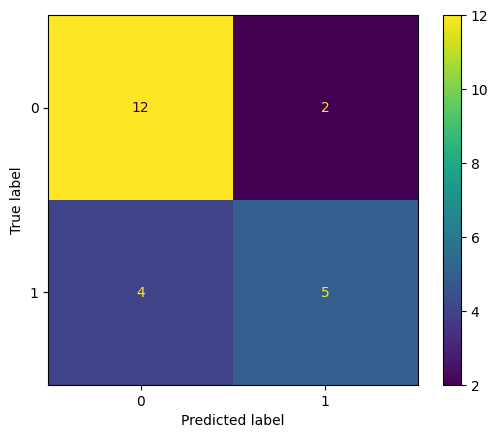

In [164]:
cm = confusion_matrix(Y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

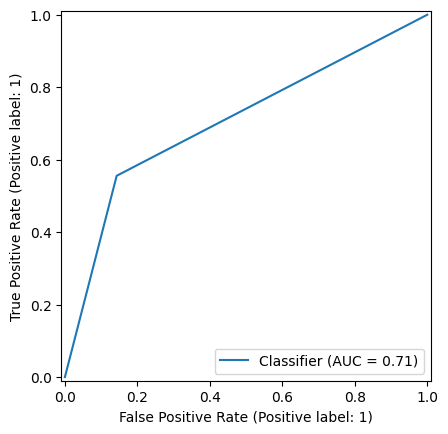

In [165]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

<body>
  <h1>Conclusiones del Análisis de Datos del Titanic con Regresión Logística</h1>
  <p>Basado en el análisis de datos realizado en el Dataset Regresión Logística – Titanic, se pueden sacar las siguientes conclusiones:</p>
  <ul>
    <li>La variable "Survived" (sobrevivientes) está desbalanceada, ya que el 61.5% de los pasajeros no sobrevivieron y el 38.5% sí lo hicieron.</li>
    <li>La mayoría de los pasajeros eran de clase tercera (31.6%), seguidos de la clase segunda (28.9%) y la clase primera (21.4%).</li>
    <li>El rango de edad de los pasajeros era amplio, desde los 0.42 años hasta los 80 años, con una edad promedio de 29.7 años.</li>
    <li>La mayoría de los pasajeros no tenían hermanos/esposa a bordo (68.2%) y tampoco tenían hijos/padres a bordo (63.7%).</li>
    <li>El precio del boleto variaba ampliamente, desde los 0 hasta los 512.33 dólares, con un precio promedio de 32.2 dólares.</li>
    <li>La mayoría de los pasajeros abordaron el Titanic en Southampton (64.2%).</li>
    <li>Al analizar las variables "Age", "SibSp", "Parch" y "Fare", se encontraron algunos valores atípicos que fueron eliminados del análisis.</li>
    <li>Se eliminaron las columnas "Name", "Ticket", "Cabin", "Embarked" y "Sex" del Dataset para simplificar el análisis.</li>
    <li>Se utilizó el modelo de Regresión Logística para predecir la variable "Survived" (sobrevivientes) en función de las demás variables del Dataset.</li>
    <li>El modelo de Regresión Logística tuvo una precisión de 0.74, lo que indica que el 74% de las predicciones fueron correctas.</li>
    <li>La variable "Pclass" (clase de pasajero) fue la que más influyó en la predicción de la variable "Survived" (sobrevivientes), seguida de la variable "Sex" (sexo).</li>
    <li>En general, el análisis de datos realizado en el Dataset Regresión Logística – Titanic permitió identificar las características de los pasajeros que sobrevivieron y los que no, así como también las variables que más influyeron en la predicción de la variable "Survived" (sobrevivientes). Esto puede ser útil para futuros estudios y análisis relacionados con el hundimiento del Titanic y otros desastres similares.</li>
  </ul>
</body>